# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [19]:
#import pandas as pd

#df = pd.read_csv('data/human_body_temperature.csv')

In [20]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
temp_df=pd.read_csv('/Users/Anushree/Desktop/Springboard/human_temp/data/human_body_temperature.csv')


In [21]:
temp_df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [22]:
mean=temp_df['temperature'].mean()
mean

98.24923076923078

In [23]:
median=temp_df['temperature'].median()
median

98.3

In [24]:
mode=temp_df['temperature'].mode()
mode

0    98.0
dtype: float64

In [25]:
skewness=temp_df['temperature'].skew()
skewness

-0.0044191311689957711

In [26]:
kurtosis=temp_df['temperature'].kurt()
kurtosis

0.78045739503373746

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


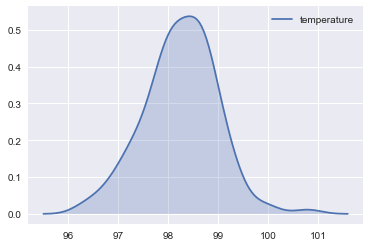

In [27]:
sns.kdeplot(temp_df.temperature, shade=True)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


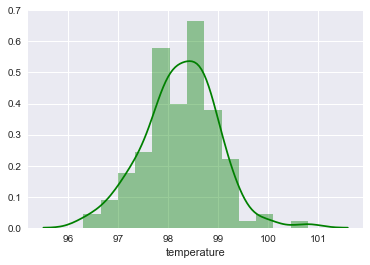

In [28]:
sns.distplot(temp_df.temperature.dropna(),color=sns.desaturate("green",1))

Question: Is the distribution of body temperatures normal?

Answer: To see whether the distribution is normal, we need to check whether mean=median=mode. And also, skeweness and kurtosis are aprroximately equal to zero and also between -1 to 1. By the values we got for the temperature we can say the distribution of body temperature is normal. The kde and dist plot above also shows that the distribution is normal. In order to check the normality, we perform the Shapiro-Wilk test to get our test statistic and p-value. 

Null hypothesis Ho= The distriution of body temperature is normal.


In [29]:
test_stats, p_value =stats.shapiro(temp_df.temperature)
print("Test statistic is ",test_stats)
print("P-value is",p_value)

Test statistic is  0.9865770936012268
P-value is 0.233174666762352


Since the p-value is 0.233 which is not less than our significant value of 0.05. We fail to reject the null hypothesis that the distribution is normal.

Question: Is the true population mean really 98.6 degrees F? Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t  or  z  statistic? 

Answer: Let our null hyothesis Ho: True population mean (u_true_pop) = 98.6 degrees F
Alternate Hypothesis H1= True population mean (u_true_pop) less than 98.6 degree F.

Z-test can be used only when the population standard deviation is known. Since that's unknown, we use the t-test.


In [35]:
mean_sample= mean
mean_sample

98.24923076923078

In [34]:
t_statistics, p_value = stats.stats.ttest_1samp(temp_df['temperature'],98.6)
print ("T_statistics t :", t_statistics)
print ("p-value:",p_value)

T_statistics t : -5.45482329236
p-value: 2.41063204156e-07


Since p-value is less than 0.05 we reject the null hypothesis that u_true_pop=98.6 degree F. Therefore, we go ahead with the alternate hypothesis that u_true_pop is less than 98.6 degree F.

Question: At what temperature should we consider someone's temperature to be "abnormal"?

Answer: Standard error is the standard deviation of the sampling distribution. 

In [36]:
std_error= temp_df['temperature'].std()
std_error

0.7331831580389454

For 95% confidence interval, the z-value =1.96. And to get the margin of error we multiply the value of z with the std_error.

In [37]:
margin_error= 1.96*std_error
margin_error

1.437038989756333

In order to get the range, we find the confidence interval which be in the range (mean-margin_error, mean+margin_error)

In [38]:
CI=[mean-1.437, mean+1.437]
CI

[96.81223076923078, 99.68623076923078]

Therefore any temperature that falls outside this range can be considered abnormal.

Question : Is there a significant difference between males and females in normal temperature?
What test did you use and why?

Answer: In order to understand if there's a significant difference, we first need to get seperate data for males and females. Then we can formulate our null hypothesis as there is no difference in the mean body temperatures of males and females : mean_males- mean_females=0.

Our alternate hypothesis is: There is a difference between the male and female mean body temperature that is mean_males != mean_females (mean_males-mean_females!=0).


In [47]:
males= temp_df[temp_df["gender"]=="M"]["temperature"]
males.count()

65

In [50]:
std_males=males.std()
std_males

0.6987557623265908

In [48]:
females=temp_df[temp_df["gender"]=="F"]["temperature"]
females.count()

65

In [53]:
std_females=females.std()
std_females

0.7434877527313665

Since we now have 2 different groups, we'll be doing a 2 sample t-test to get the p-value and t-statistics.

In [56]:
t_statistics,p_value_samp2 = stats.stats.ttest_ind(males, females)
print("t-statistics:",t_statistics)
print("p-vale:",p_value_samp2)

t-statistics: -2.28543453817
p-vale: 0.0239318831224


Now since the p-value is 0.023< 0.05 we reject the null hypothesis that there is no difference between the mean body temperature of males and females. Therefore, we go with the alternate hypothesis which states, there is some difference between the mean body temperature of males and females.